In [28]:
import matplotlib.pyplot as plt
import networkx as nx
import typing as t
import warnings

warnings.simplefilter("ignore")

from flox.flock.factory import create_hierarchical_flock
from flox.flock import NodeKind
from topo import *

In [29]:
def draw_tree(g, node_size: int = 100, ax=None):
    if ax is None:
        ax = plt.axes()
    color_map = {
        NodeKind.LEADER: "green",
        NodeKind.AGGREGATOR: "red",
        NodeKind.WORKER: "blue",
    }
    colors = [
        color_map[node[1]["kind"]]
        for node in g.nodes(data=True)
    ]
    pos = nx.nx_pydot.pydot_layout(g, prog="dot")
    labels = nx.get_node_attributes(g, "kind")
    nc = nx.draw_networkx_nodes(g, pos=pos, node_color=colors, node_size=node_size, ax=ax)
    __ = nx.draw_networkx_edges(g, pos=pos, ax=ax)
    ax.axis("off")

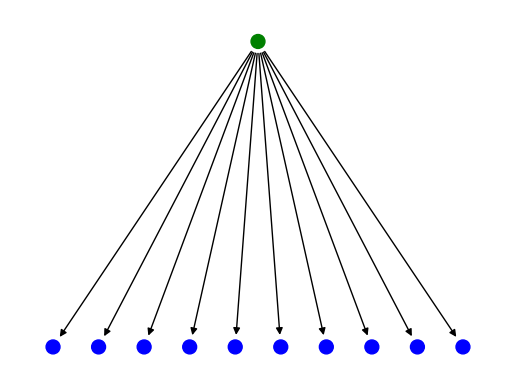

In [13]:
g = balanced_flock(10)
draw_tree(g)
plt.show()

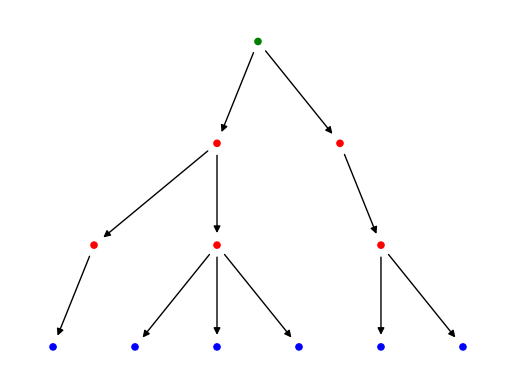

In [14]:
g = balanced_flock(6, [2, 3])
draw_tree(g, node_size=20)
plt.show()

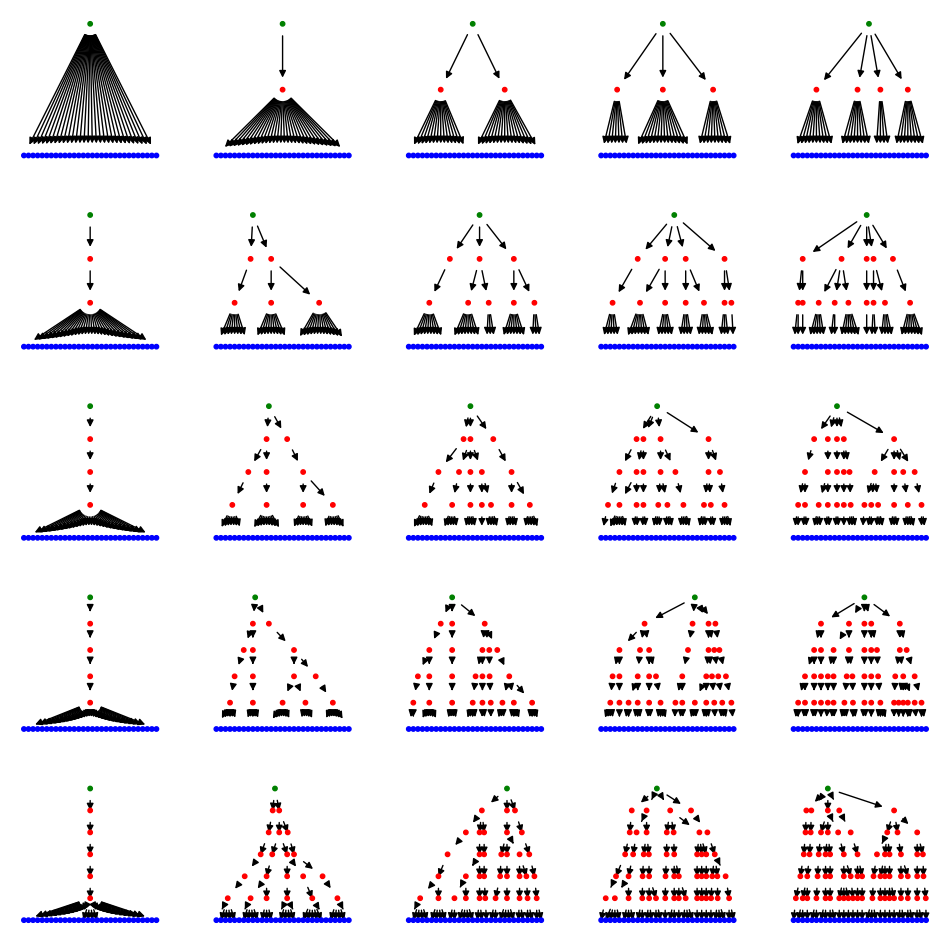

In [27]:
rows, cols = 5, 5
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 12))
for r in range(1, rows + 1):
    for c in range(cols):
        if r == 1 and c == 0:
            structure = None
        elif r == 1:
            structure = [c]
        else:
            structure = []
            curr_val = c + 1
            for i in range(r):
                structure.append(curr_val)
                curr_val += c

        tree = balanced_flock(30, structure)
        draw_tree(tree, node_size=10, ax=axes[r - 1, c])
plt.show()